In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the classes attribute to get all the classes
# classes = Base.classes

# reflect the tables
# for class_name, class_obj in classes.items():
#     print(class_name)

# View all of the classes that automap found
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print(recent_date)

2017-08-23


2017-08-23


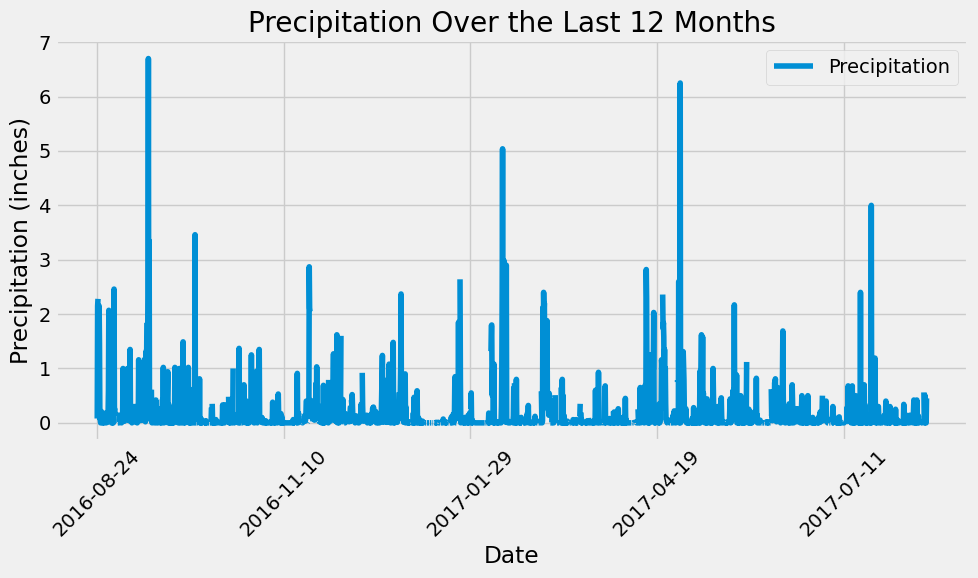

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
print(latest_date)
one_year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp)\
                            .filter(measurement.date >= one_year_ago)\
                            .order_by(measurement.date)\
                            .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
hawaii_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
hawaii_df = hawaii_df.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
hawaii_df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Assuming 'df' is your DataFrame containing the precipitation data
summary_statistics = hawaii_df['Precipitation'].describe()

print(summary_statistics)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the datase
total_stations = session.query(func.count(station.station)).scalar()

print(total_stations)


9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station))\
                              .group_by(measurement.station)\
                              .order_by(func.count(measurement.station).desc())\
                              .all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station, func.count(measurement.station))\
                              .group_by(measurement.station)\
                              .order_by(func.count(measurement.station).desc())\
                              .first()[0]

temperature_stats = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs))\
                            .filter(measurement.station == most_active_station)\
                            .first()

print(temperature_stats)


(54.0, 71.66378066378067, 85.0)


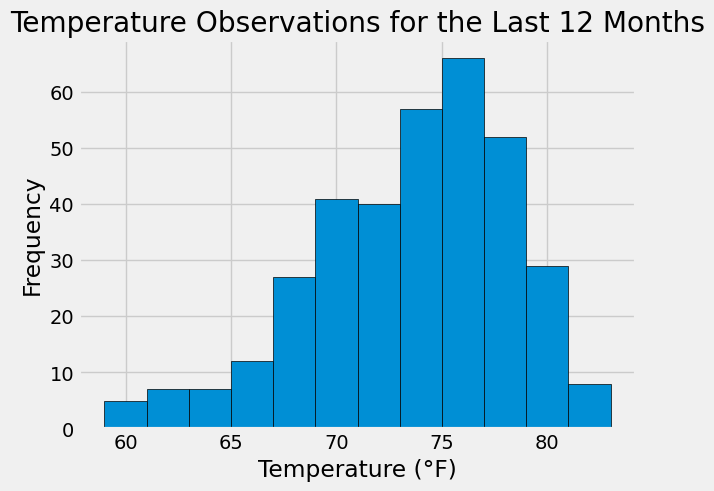

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Step 1: Calculate the date one year ago from the most recent date in the dataset
latest_date = session.query(func.max(measurement.date)).scalar()
one_year_ago = dt.datetime(2017, 8, 23) - pd.Timedelta(days=365)

# Step 2: Perform a query to retrieve temperature observations for the most active station from the last 12 months
temperature_observations = session.query(measurement.tobs)\
                                  .filter(measurement.station == most_active_station)\
                                  .filter(measurement.date >= one_year_ago)\
                                  .all()

# Step 3: Save the query results into a Pandas DataFrame
hawaii_tobs_df = pd.DataFrame(temperature_observations, columns=['Temperature'])

# Step 4: Plot the histogram of temperature observations
plt.hist(hawaii_tobs_df['Temperature'], bins=12, edgecolor='black')
plt.title('Temperature Observations for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Close Session

In [20]:
# Close Session
session.close()